<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="200" height="200"><br>
</center>

# chapte.2 데이터 다루기

## 02-1 훈련 세트와 테스트 세트

### - 지도 학습과 비지도 학습

머신러닝 알고리즘은 크게 지도학습과 비지도학습으로 나눌 수 있다. 지도 학습 알고리즘은 훈련하기 위한 데이터와 정답이 필요하다.
지도 학습에서는 데이터와 정답을 입력과 타깃이라고 하고, 이 둘을 합쳐 훈련 데이터라고 부른다.
지도 학습은 정답이 있어 알고리즘이 정답을 맞히는 것을 학습한다. 반면 비지도 학습 알고리즘은 타깃 없이 입력 데이터만 사용한다.
이런 종류의 알고리즘은 정답을 사용하지 않으므로 무언가를 맞힐 수가 없다. 대신 데이터를 잘 파악하거나 변형하는 데 도움을 준다.

### - 훈련 세트와 테스트 세트

연습문제와 시험문제가 달라야 올바르게 학생의 능력을 평가할 수 있듯 머신러닝 알고리즘의 성능을 제대로 파악하기 위해선 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 한다. 이렇게 하는 가장 간단한 방법은 평가를 위해 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에 일부를 떼어 내어 활용하는 것이다. 일반적으론 후자의 경우가 많다. 평가에 사용하는 데이터를 테스트 세트, 훈련에 사용되는 데이터를 훈련 세트라고 한다.

앞장의 도미와 빙어의 데이터를 합쳐 하나의 파이썬 리스트로 준비하자.

In [113]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [114]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

이때 하나의 생선 데이터를 샘플이라고 부른다. 전체 데이터는 총 49개의 샘플이 있다. 사용하는 특성은 길이와 무게 2개이다. 이 데이터의 처음 35개를 훈련 세트로, 나머지 14개를 테스트 세트로 사용해보자.

In [115]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

이제 전체 데이터에서 처음 35개를 선택해야 한다. 일반적으로 리스트처럼 배열의 요소를 선택할 때는 배열의 위치, 즉 인덱스를 지정한다.
예를 들어 fish_data의 다섯 번째 샘플을 출력하기 위해선 다음과 같이 하면 된다.

In [116]:
print(fish_data[4])

[29.0, 430.0]


파이썬 리스트는 인덱스 외에도 슬라이싱이라는 특별한 연산자를 제공한다. 슬라이싱은 콜론(:)을 가운데 두고 인덱스의 범위를 지정하여 여러 개의 원소를 선택할 수 있다. 예를 들어 첫 번째부터 다섯 번째까지의 샘플을 선택해 보자.

In [117]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


슬라이싱을 사용할 때는 마지막 인덱스의 원소는 포함하지 않는다는 점을 주의해야한다.

위처럼 0:5 와 같이 처음부터 시작되는 슬라이싱의 경우 0을 생략하고 쓸 수 있다.

In [118]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


이와 비슷하게 마지막 원소까지 포함할 경우 두 번째 인덱스를 생략할 수 있다. 

In [119]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [120]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

슬라이싱 연산으로 인덱스 0 ~ 34 까지 처음 35개 샘플을 훈련 세트로 선택했고, 인덱스 35 ~ 48까지 나머지 14개 샘플을 테스트 세트로 선택했다. 데이터를 준비했으니 훈련 세트로 fit() 메서드를 호출해 모델을 훈련하고, 테스트 세트로 score() 메서드를 호출해 평가해보자.

In [121]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

값이 0이 나왔다. 왜 이런 최악의 성능을 내는 걸까? 다음장에서 배워보자.

## - 샘플링 편향

앞서 테스트 데이터를 만들 때 테스트 세트에 빙어만 들어가 있었다. fish_data에는 35개의 도미와 14개의 빙어 샘플이 들어가 있는데 마지막 테스트 세트에는 14개의 빙어 데이터만 들어가있다.

상식적으로 훈련하는 데이터와 테스트하는 데이터에는 도미와 빙어가 골고루 섞여 있어야 한다. 일반적으로 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향 이라고 부른다.
이 예제에서 훈련 세트에는 도미만 있기 때문에 테스트 세트가 무엇이든 무조건 도미라고 분류한다. 그런데 테스트 세트에는 빙어만 있기 때문에 정답을 하나도 맞히지 못한 것이다.

데이터를 골고루 섞기 위해 파이썬 라이브러리인 넘파이에 대해 알아보자.

## - 넘파이

넘파이는 파이썬의 대표적인 배열 라이브러리이다. 넘파이는 고차원 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공한다.

앞의 생선 데이터를 2차원 넘파이 배열로 변환해보자. 먼저 넘파이를 임포트한다.

In [122]:
import numpy as np

넘파이 array() 함수에 파이썬 리스트를 전달하자.

In [123]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [124]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


동일한 출력 결과를 보인다. 넘파이 배열 객체는 배열의 크기를 알려주는 shape() 속성을 제공한다. 위의 결과처럼 49개의 행과 2개의 열이 확인되는지 알아보자.

In [125]:
print(input_arr.shape)

(49, 2)


이제 생선 데이터를 넘파이 배열로 준비했으므로 이 배열에서 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만들 차례이다.
배열을 섞은 후에 나누는 방식 대신에 무작위로 샘플을 고르는 방법을 사용하자.
여기서 주의할 점은 input_arr와 target_arr에서 같은 위치는 함께 선택되어야 한다는 것이다.
이렇게 하려면 훈련 세트와 테스트 세트로 나눌 인덱스값을 잘 기억해야한다. 하지만 항상 기억할 수는 없으니 아예 인덱스를 섞은 다음에 input_arr와 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나누는 셈이 된다.

넘파이 arange() 함수를 사용하면 0부터 48까지 1씩 증가하는 인덱스를 간단히 만들 수 있다.

In [126]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

넘파이 arange() 함수에 정수 N을 전달하면 0부터 N-1 까지 1씩 증가하는 배열을 만든다. 넘파이 random 패키지 아래에 있는 shuffle() 함수는 주어진 배열을 무작위로 섞는다.

In [127]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


이제 랜덤하게 섞인 인덱스를 사용해 전체 데이터를 훈련 세트와 테스트 세트로 나누어 보자.

넘파이는 슬라이싱 외에 배열 인덱싱이라는 기능을 제공한다. 배열 인덱싱은 1개의 인덱스가 아닌 여러개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다.

In [128]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


새로 만든 index 배열로 랜덤하게 35개의 샘플을 훈련 세트로 만들어보자.

In [129]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

만들어진 index의 첫 번째 값은 13이다. 따라서 train_input의 첫 번째 원소는 input_arr의 열네 번째 원소가 들어가 있을 것이다.

In [130]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


이번엔 나머지 14개를 테스트 세트로 만들어 보자.

In [131]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

훈련 세트와 테스트 세트에 도미와 빙어가 잘 섞여 있는지 산점도로 그려보자.

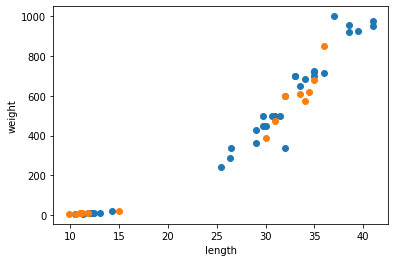

In [132]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

파란색이 훈련세트이고 주황색이 테스트 세트이다. 양쪽에 도미와 빙어가 잘 섞여있다. 이제 모델을 다시 훈련시켜 보자.

## - 두 번째 머신러닝 프로그램

앞서 만든 훈련 세트와 테스트 세트로 k-최근접 이웃 모델을 훈련시켜 보자. fit() 메서드를 할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버린다. 이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 한다. 여기에서는 단순하게 이전에 만든 kn 객체를 그대로 사용하자.

In [133]:
kn = kn.fit(train_input, train_target)

인덱스를 섞어 만든 train_input과 train_target으로 모델을 훈련시켰다. 다음은 test_input과 test_target으로 이 모델을 테스트할 차례이다.

In [134]:
kn.score(test_input, test_target)

1.0

이제 100% 정확도로 테스트 세트에 있는 모든 생선을 맞혔다. predict() 메서드로 테스트 세트의 예측 결과와 실제 타깃을 확인해 보자.

In [135]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [136]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

테스트 세트에 대한 예측 결과가 정답과 일치한다. 두 결과 모두 동일하게 array()로 감싸져 있다. 이 값은 넘파이 배열을 의미한다. 즉 predict() 메서드가 반환하는 값은 단순한 파이썬 리스트가 아닌 넘파이 배열이다. 사실 사이킷런 모델의 입력과 출력은 모두 넘파이 배열이다.

## 02-2 데이터 전처리


### - 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

넘파이의 column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결한다. 다음과 같이 2개의 리스트를 붙여보자. 연결한 리스트는 파이썬 튜플로 전달한다.

In [3]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

이제 fish_length와 fish_weight를 합치자.


In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


이제 타겟 데이터를 만들어 보자. 앞서 [1],[0]을 여러번 곱하여 타깃 데이터를 만들었다. 하지만 넘파이의 np.ones()와  np.zeros() 함수로 원하는 개수의 1과 0을 채운 배열을 만들어 준다.

In [7]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


이 두함수를 이용해 1이 35개인 배열과 0시 14개인 배열을 간단히 만들 수 있다. 그다음  두 배열을 그대로 연결하자. 이번엔 np.column_stack() 함수 대신 첫 번째 차원을 따라 배열을 연결하는 np.concatenate() 함수를 사용한다. 

In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### - 사이킷런으로 훈련 세트와 테스트 세트 나누기

앞에서는 넘파이 배열의 인덱스를 직접 섞어서 훈련 세트와 테스트 세트로 나누었다. 이번엔 다른 방법을 이용해 보자.

사이킷런은 머신러닝 모델을 위한 알고리즘뿐만 아니라 다양한 유틸리티 도구도 제공한다. 대표적인 도구가 바로 train_test_split() 함수이다.
이 함수는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 준다. 그리고 잘 섞어준다.

In [11]:
from sklearn.model_selection import train_test_split

train_test_split() 함수에는 자체적으로 랜덤 시드를 지정할 수 있는 random_state 매개 변수가 있다. 다음과 같이 훈련 세트와 테스트 세트를 나누자.

In [12]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

이 함수는 기본적으로 25%를 테스트 세트로 떼어낸다. shape 속성으로 입력 데이터의 크기를 출력해보자.

In [13]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [14]:
print(train_target.shape, test_target.shape)

(36,) (13,)


훈련 데이터와 테스트 데이터를 각각 36개와 13개로 나누자. 입력 데이터는 2개의 열이 있는 2차원 배열이고 타깃 데이터는 1차원 배열이다.

도미와 빙어가 잘 섞였는지 테스트 데이터를 출력해 보자.

In [15]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


13개의 테스트 세트중에 10개가 도미이고 나머지가 3개는 빙어이다. 여기서도 샘플링 편향이 나타난다. 
train_test_split() 함수는 이런 문제를 간단히 해결할 방법이 있다. 바로 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다. 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용하다.

In [17]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [18]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### - 수상한 도미 한마리

앞에서 준비한 데이터로 k-최근접 이웃을 훈련해 보자. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

올바르게 테스트 세트의 도미와 빙어를 모두 올바르게 분류했다. 다른 데이터를 넣고 결과를 확인해 보자.

In [20]:
print(kn.predict([[25, 150]]))

[0.]


결과가 빙어로 나왔다. 이렇게 큰 빙어가 나왔는데 이상해보인다. 산점도 그래프로 그려보자.

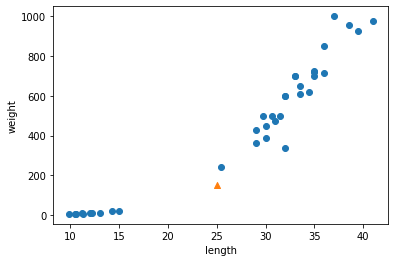

In [22]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위의 새로운 샘플은 marker 매개변수를 '^'로 지정하여 삼각형으로 나타내었다. 그래프로 보면 도미 데이터에 더 가깝다. 하지만 왜 빙어에 가깝다고 판단한 것일까?
k-최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용한다. 이 샘플의 주변 샘플을 알아보자. KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까움 이웃을 찾아주는 kneighbors() 메서드를 제공한다. 이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환한다.
KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환된다.

In [23]:
distances, indexes = kn.kneighbors([[25,150]])

indexes 배열을 사용해 훈련 데이터중에서 이웃 샘플을 따로 구분해 그려보자.

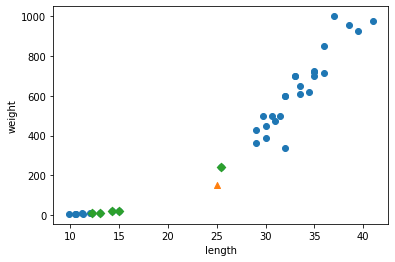

In [25]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

marker='D'로 지정하면 산점도를 마름모로 그린다. 삼각형 샘플의 가장 가까운 5개의 샘플이 초록 다이아몬드로 표시되었다. 예측 결과와 마찬가지로 가장 가까운 이웃에 도미가 하나밖에 포함되지 않았다. 나머지 4개는 모두 빙어이다.

In [26]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


확실히 가장 가까운 생선 4개는 빙어(0)인 것 같다. 타깃 데이터로 확인하면 더 명확하다.

In [27]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


길이가 25 무게가 150인 생선에 가장 가까운 이웃에는 빙어가 압도적으로 많다. 따라서 이 샘플의 클래스를 빙어로 예측하는 것은 무리가 아니다. 하지만 산점도를 보면 직관적으로 도미와 가깝게 보인다. 이 문제의 해결 실마리를 찾기위해 kneighbors() 메서드에서 반환한 distances 배열을 출력해보자.

In [28]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### - 기준을 맞춰라


위 산점도를 보면 삼각형 샘플에 가장 가까운 첫 번째 샘플까지의 거리는 92이고 나머지는 130,138이다. 하지만 그래프의 거리비율이 이상하다. 그 이유는 x축은 범위가 좁고(10 ~ 40), y축은 범위가 넓다(0 ~ 1000). 따라서 y축으로 조금만 멀어져도 거리가 아ㅈ 큰 값으로 계산이 된다. 이 때문에 오른쪽 위의 도미 샘플이 이웃으로 선택되지 못했다. 이를 눈으로 확인하기 위해 x축의 범위를 0~1000으로 맞추어보자. xlim()함수를 사용하자.


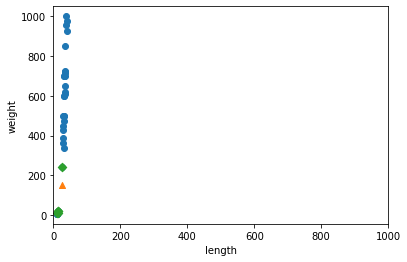

In [29]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

산점도가 거의 일직선으로 나타난다. x축과 y축의 범위를 동일하게 맞추었더니 모든 데이터가 수직으로 늘어선 형태가 되었다. 확실히 이런 데이터라면 생선의 길이는 가장 가까운 이웃을 찾는데 크게 영향을 미치지 못한다.

두 특성의 값이 놓인 범위가 매우 다르다. 이를 두 특성의 스케일이 다르다고 한다. 데이터를 표현하는 기준이 다르다면 알고리즘이 올바르게 예측할 수 없다. 이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 한다. 이런 작업을 데이터 전처리라고 한다.

가장 널리 사용하는 전처리 방법 중 하나는 표준점수이다(혹은 z-score라고도 한다). 표준점수는 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

넘파이에서 제공하는 함수를 이용해 구해보자.

In [30]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

np.mean()함수는 평균, np.std()는 표준편차를 계산한다.


In [31]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


각 특성마다 평균과 표준편차가 구해졌다. 이제 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환하자.

In [32]:
train_scaled = (train_input - mean) / std

### - 전처리 데이터로 모델 훈련하기

앞에서 표준점수로 변환한 train_scaled를 만들었다. 산점도로 그려보자.

In [ ]:
plt.scatter(t)